# Executive Summary

In this exercise we compared the execution time of two search algorithms: 1) binary search 2) linear search. Because binary search requires data to be sorted we compared the binary search with and without the sorting algorithms. We used arrays of integers (size of 512, 1024, 2048, 4096, 8762) as sorting objects. The results and the analysis show that the binary search with sorting is 9x faster then linear, and about 75x faster if the data is already sorted (see ***Cell 68*** for these conclusions) Also ***Cells 64,65, and 66*** compare the performance graphically using seaborn plots.  

The methodology for this exercise used the arrays of integers as sorting objects. I used IPython **timeit** magic command for each test. Becuase the execution time can be affected by various factors each comparison was repeated at least 100x and the average of the execution time was used as a benchmark. 

Linear Search has a big O of O(n). The expectation is that when represented graphically the execution time increase in a linear fashion. This has been observed in ***Cell 64*** that shows the execution time on the Y-axis and the array size on X-axis for linear search. Binary Search has BigO of O(log n). Log N has a non-linear concave shape; it increases but not in a linear fashion and starts flatting out as it approaches large N. In the graph in ***Cell 65*** we can't see the full bending of the log function. We need a much larger N for that. The largest array in our experiment is 8762. However, we can observe a non-linear shape which is consistent with Big O notation.

Finally, in ***Cell 66*** we can observe the execution time for all algorithms. Because binary search (with and without sort) has significantly different execution times this graph has two axes. left Y-axis is time in ms for Linear Search while the right Y-axis is scaled based on the binary and binary+sort algorithms. From this graph, we can observe that even with sort binary search is significantly faster (~9x) than the linear search, while binary search has basically flat line when compared to linear search execution times. In this exercise, binary search alone is about 75x faster than linear search. One thing to note is that binary search with sort has an almost identical shape as linear search on this graph. I used the **mergesort** algorithm for sorting which has a big O of ***O(n x log n)***. This function has an interesting shape. At low Ns, log dominates but as N increases the function gets linear shape. Therefore when binary and sort (using mergesort) is used log shape is dominated by Linear Function and the combination of the two is becomes linear. Nonetheless, even so, binary+sort is still significantly faster than linear search alone.


In [1]:
import numpy as np
 
def create_random_array(low,high,size,seed):    
    np.random.seed(seed)
    integer_array = np.random.randint(low,high,size)   
    return integer_array  #  np.sort(integer_array, kind='quicksort' )

class BinarySearch():
    
  def search_iterative(self, list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
      # The guess was too high.
      if guess > item:
        high = mid - 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

  def search_recursive(self, list, low, high, item):
    # Check base case 
    if high >= low: 
  
        mid = (high + low) // 2
        guess = list[mid]
  
        # If element is present at the middle itself 
        if guess == item:
            return mid 
  
        # If element is smaller than mid, then it can only 
        # be present in left subarray 
        elif guess > item: 
            return self.search_recursive(list, low, mid - 1, item) 
  
        # Else the element can only be present in right subarray 
        else: 
            return self.search_recursive(list, mid + 1, high, item) 
  
    else: 
        # Element is not present in the array 
        return None
    
    

def linear_search(mylist, item):
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
      
    return None

# 1.

To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers from 1 to 10000.  You may use the numpy package for this.  

### Lets create arrays

In [2]:
    
array_512 = create_random_array(low=1,high=10000+1,size=512, seed=1)
array_1024 = create_random_array(low=1,high=10000+1,size=1024, seed=1)
array_2048 = create_random_array(low=1,high=10000+1,size=2048, seed=1)
array_4096 = create_random_array(low=1,high=10000+1,size=4096, seed=1)
array_8192 = create_random_array(low=1,high=10000+1,size=8192, seed=1)

arrays = [array_512,array_1024, array_2048,array_4096,array_8192 ]

# Execution time for sort array  

In [3]:
results_sort = []
for array  in arrays: 
    results = %timeit -n 1000 -o  np.sort(array,kind='mergesort')
    results_sort.append(results.average)

20.2 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
38.9 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
80.2 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
175 µs ± 5.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
377 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
results_sort

[2.0215531857138966e-05,
 3.8872089857144535e-05,
 8.020535114285922e-05,
 0.00017489565557142684,
 0.00037704944371428647]

# 2.
### Before we run a binary search test, actually sort the data

Sort each of the random number arrays from smallest to largest.  You may use any algorithm to sort the data.

In [5]:
array_512  = np.sort(array_512,kind='mergesort')
array_1024 = np.sort(array_1024,kind='mergesort')
array_2048 = np.sort(array_2048,kind='mergesort')
array_4096 = np.sort(array_4096,kind='mergesort')
array_8192 = np.sort(array_8192,kind='mergesort')


arrays = [array_512,array_1024, array_2048,array_4096,array_8192 ]

# 3. 
Execute the base search algorithm (binary search) (from the text and github code) for each of array, noting the execution time for each array.  With each execution use the maximum value of the random number array as the number for which you are searching.

In [39]:
bs = BinarySearch()  

results_binary = []
for array  in arrays: 
    results = %timeit -n 10000 -o   bs.search_iterative(array, array.max())
    results_binary.append(results.average)

12.7 µs ± 720 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
13.7 µs ± 324 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
15.3 µs ± 87.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
18.7 µs ± 167 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
24 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [28]:
results_binary

[1.3407402028574973e-05,
 1.7549098028575824e-05,
 1.7221118171430913e-05,
 2.1861977685713492e-05,
 2.7241628457142855e-05]

# 4.

Now we will compare this to a linear search.  Use python (perhaps with the Pandas package) to prepare a five-column table containing the following columns with all times in milliseconds:

* length of the random number array
* sort time
* linear search time for the sorted array
* binary search time for the sorted array
* binary search plus sort times

In [9]:
results_linear = []
for array  in arrays: 
    results = %timeit -n 1000 -o  linear_search(array, array.max())
    results_linear.append(results.average)

232 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
462 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
980 µs ± 52.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.92 ms ± 76.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.7 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
results_linear

[0.00023174062757139576,
 0.000461839602999979,
 0.0009804212912856655,
 0.0019159001468571463,
 0.003700574957714285]

# 5.


Use python matplotlib or Seaborn to generate a plot with the size of the random number array on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for linear and binary search algorithms alone.  Discuss the results.


In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [40]:
data = [
    [512,1024,2048,4096,8192],
    results_sort,
    results_linear,
    results_binary,
 
    np.array(results_sort) + np.array(results_binary)
    
] 
data_df = pd.DataFrame(data).T
data_df.columns =['array_length','sort_time', 'linear','binary','binary+sort']
data_df

,array_length,sort_time,linear,binary,binary+sort
0,512.0,0.000020,0.000232,0.000013,0.000033
1,1024.0,0.000039,0.000462,0.000014,0.000053
2,2048.0,0.000080,0.000980,0.000015,0.000096
3,4096.0,0.000175,0.001916,0.000019,0.000194
4,8192.0,0.000377,0.003701,0.000024,0.000401


# Plot data

### Cells 64 and  Cells 65

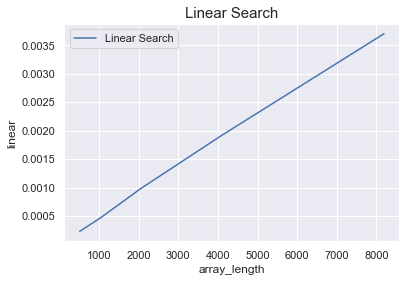

In [64]:
 
sns.lineplot(data=data_df, x="array_length", y="linear", label = 'Linear Search')
plt.legend()
plt.title('Linear Search',fontsize= 15);

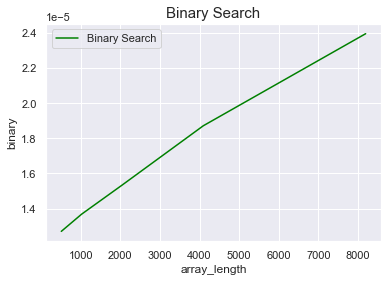

In [65]:
sns.lineplot(data=data_df, x="array_length",color='green', y="binary",label='Binary Search' )
plt.legend()
plt.title('Binary Search',fontsize= 15);

# Discussion

Linear Search has a big O of O(n). The expectation is that when represented graphically the execution time increase in a linear fashion. This has been observed in ***Cell 64*** that shows the execution time on the Y-axis and the array size on X-axis for linear search. Binary Search has BigO of O(log n). Log N has a non-linear concave shape; it increases but not in a linear fashion and starts flatting out as it approaches large N. In the graph in ***Cell 65*** we can't see the full bending of the log function. We need much larger N for that. The  largest array in our  size is 8762. However, we can observe a non-linear shape which is consistent with Big 0 notation.


# 6.
Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for each form of the algorithm being tested (last four columns of the table).  Discuss the results.

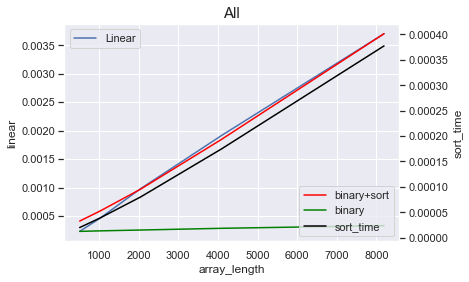

In [67]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(data=data_df, x="array_length", y="linear",label='Linear', ax=ax1)
ax1.legend(loc='upper left')


ax2 = plt.twinx()
sns.lineplot(data=data_df, x="array_length",color='red', y="binary+sort",label='binary+sort', ax=ax2)
sns.lineplot(data=data_df, x="array_length",color='green', y="binary",label='binary', ax=ax2)
sns.lineplot(data=data_df, x="array_length",color='black', y="sort_time",label='sort_time', ax=ax2)

ax2.grid(False)
ax2.legend(loc='lower right' )
plt.title('All',fontsize= 15);

# Some additional Analysis

In [68]:
print(np.mean(data_df['linear']/data_df['binary+sort']))
print(np.mean(data_df['linear']/data_df['binary']))

9.042935236192713
74.54890246304355


# Merge sort Big O 

Merge sort is also almost linear as N increase.

https://numpy.org/doc/stable/reference/generated/numpy.sort.html

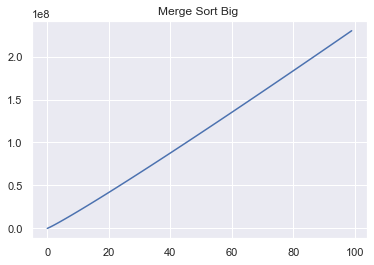

In [69]:
merge_sort = []
for i in range(1,10000000,100000):
    n= 128*(2**i)
#     print(n)
    n=i
    big_o = n*np.log2(n)
    merge_sort.append(big_o)
pd.Series(merge_sort).plot()
plt.title("Merge Sort Big ");